In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-4nxk6cye because the default path (/home/sarslan/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
FIG_SIZE = (8,5)
plt.rcParams["figure.figsize"] = FIG_SIZE
FONT_SIZE = 16
LINE_STYLE = (0,(4,4))
LINE_WIDTH = 3.5
SAVE_FIG = False

In [3]:
EXP_ID = '230505-1355'
exp_filename = '../data/' + EXP_ID + '/energy.log'

if (SAVE_FIG):
    out_dir = '../outputs/' + EXP_ID + '/'
    if (not os.path.exists(out_dir)):
        os.mkdir(out_dir)

In [4]:
def read_data(exp_filename):
    data = []
    with open(exp_filename,'r') as f:
        for line in f:
            exp = {}
            for item in line.split():
                key, val = item.split('=')
                if key in ['energy_uJ']:
                    val = float(val)
                exp[key] = val
            data.append(exp)

    df = pd.DataFrame(data)
    return df

In [5]:
exp_df = read_data(exp_filename)
exp_df['energy_kJ'] = exp_df['energy_uJ'] * 10e-9
exp_df

,cc,mtu,energy_uJ,energy_kJ
0,udp,1500,1.078571e+09,10.785707
1,udp,1500,1.069061e+09,10.690615
2,udp,1500,8.929926e+08,8.929926
3,udp,1500,1.040796e+09,10.407959
4,udp,1500,1.015749e+09,10.157495
...,...,...,...,...
155,none,9000,3.337141e+08,3.337141
156,none,9000,3.380042e+08,3.380042
157,none,9000,3.293417e+08,3.293417
158,none,9000,3.318953e+08,3.318953


In [6]:
print('\n', exp_df.groupby(['cc', 'mtu'])['energy_kJ'].mean().unstack().sort_values(['1500']), 
      '\n', exp_df.groupby(['cc', 'mtu'])['energy_kJ'].std().unstack().sort_values(['1500']))


 mtu        1500      9000
cc                       
bbr    3.423639  3.057121
dctcp  3.666994  3.110719
reno   3.672521  3.063958
vegas  3.703541  3.061641
cubic  3.785757  3.107148
none   4.051386  3.383857
bbr2   4.535780  3.384168
udp    9.937685  4.992334 
 mtu        1500      9000
cc                       
bbr    0.078054  0.085728
none   0.120018  0.094656
bbr2   0.139435  0.521085
vegas  0.195255  0.079343
reno   0.214638  0.102527
dctcp  0.243582  0.221691
cubic  0.295467  0.224380
udp    0.738409  0.451445


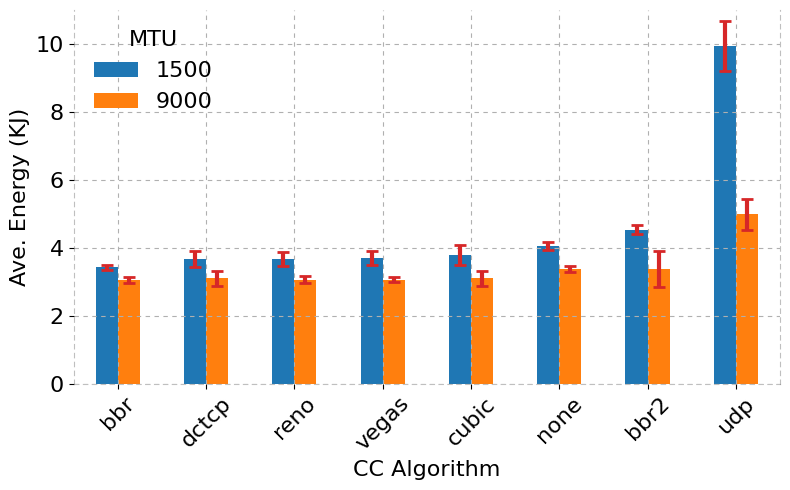

In [7]:
# plt.figure(figsize=FIG_SIZE)
exp_df.groupby(['cc', 'mtu'])['energy_kJ'].mean().unstack().sort_values(['1500']).plot.bar(
    yerr=exp_df.groupby(['cc', 'mtu'])['energy_kJ'].std().unstack().sort_values(['1500']), 
    error_kw=dict(lw=3, capsize=4, capthick=2, ecolor='C3')
    )

plt.xlabel('CC Algorithm', fontsize=FONT_SIZE)
plt.ylabel('Ave. Energy (KJ)', fontsize=FONT_SIZE)
plt.xticks(fontsize=FONT_SIZE)
plt.yticks(fontsize=FONT_SIZE)
plt.ylim((0, 11))
plt.xticks(rotation = 45)
plt.grid(linestyle=LINE_STYLE)
leg = plt.gca().legend(loc='upper left', frameon=False, 
                 title='MTU', fontsize=FONT_SIZE)
plt.setp(leg.get_title(),fontsize=FONT_SIZE)
plt.gca().spines["right"].set_linestyle(LINE_STYLE)
plt.gca().spines["right"].set_alpha(0.5)
plt.gca().spines["right"].set_color('gray')
plt.gca().spines["left"].set_linestyle(LINE_STYLE)
plt.gca().spines["left"].set_alpha(0.5)
plt.gca().spines["left"].set_color('gray')
plt.gca().spines["top"].set_visible(False)
# plt.gca().spines["top"].set_linestyle(LINE_STYLE)
# plt.gca().spines["top"].set_alpha(0.5)
# plt.gca().spines["top"].set_color('gray')
plt.gca().spines["bottom"].set_linestyle(LINE_STYLE)
plt.gca().spines["bottom"].set_alpha(0.5)
plt.gca().spines["bottom"].set_color('gray')
plt.tight_layout()

if (SAVE_FIG):
    plt.savefig( out_dir + '/cca_energy.pdf')

plt.show()